<a href="https://colab.research.google.com/github/jplavorr/Math-projects/blob/main/Integra%C3%A7%C3%A3o_Num%C3%A9rica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><u>Interpolação</u></h1>


Considere uma função $f(x)$ cujos valores são conhecidos em um conjunto de pontos finito  $\{x_0,\,\,x_1,\,...,\,x_n\}$  

Por Exemplo: 

<table bgcolor=" grey"> 
<tr> 
<td> $x$ </td>
<td> $1$ </td>
<td> $2$ </td>
<td> $3$ </td>
<td> $4$ </td>
<td> $5$ </td>
<td> $6$ </td>
</tr> 
<tr>
<td> $f$($x$) </td>
<td> $1$ </td>
<td> $3$ </td>
<td> $-2$ </td>
<td> $5$ </td>
<td> $6$ </td>
<td> $20$ </td>
</tr>
</table>

A partir desses valores, para tentar determinar algo que não está na tabela, por exemplo, $f(2.3)$ ou $x$ tal que $f(x)=7$.

Essas tecnicas consistem em, escolhido um tipo de função(polinomial, racional, trigonometrica, etc) determinar uma função $g(x)$ que cumpra $ g(x_0) = f(x_0)$,$g(x_1) = f(x_1)$, $...$ , $g(x_n) = f(x_n)$ e usar $g(x)$ ap omvés de $f$.

Estudaremos <u><strong> interpolação polinomial </strong></u>, i.e, a função $g$ sempre será um polinômio $a_0 + a_1x + a_1x^2 + ... + a_nx^n$ que chamaremos de $p(x)$. Assim dados $n+1$ pontos $$ (x_0,f(x_0)), (x_1,f(x_1)), ..., (x_n,f(x_n)) $$ Nosso objetivo será encontrar o polinômio $p(x) = a_0 + a_1x + a_1x^2 + ... + a_nx^n$ de grau, no máximo, igual a $n$ e que satisfaça  $$p(x_0) = f(x_0), p(x_1) = f(x_1),..., p(x_n) = f(x_n) $$ 

Em outras palavras, queremos resolver o seguinte sistema

$$ \begin{cases}
a_0 + a_1x_0 + a_1x_0^2 + ... + a_nx_0^n=f(x_0) \\
a_0 + a_1x_1 + a_1x_1^2 + ... + a_nx_1^n=f(x_1) \\
\vdots     \\
a_0 + a_1x_n + a_1x_n^2 + ... + a_nx_n^n=f(x_n)
\end{cases}$$

de $n+1$ equações e $n+1$ incógnitas, que são os coeficientes $a_0,a_1,...,a_n$ de $p(x)$. Note que a matriz $A$ dos coeficientes do sistema linear tem um formato especial:

$$
\begin{equation*}
  A= 
    \begin{pmatrix}
      \begin{array}{@{} c @{} | @{} c @{} }
        \begin{matrix}
          1 & x_0 & x_0^2 &  x_0^3 & \dots & x_0^n \\  
          1 & x_1 & x_1^2 &  x_1^3 & \dots & x_1^n \\  
          1 & x_2 & x_2^2 &  x_2^3 & \dots & x_2^n \\ 
          \vdots & \vdots & \vdots & \ddots & \vdots& \vdots \\
          1 & x_n & x_n^2 &  x_n^3 & \dots & x_n^n \\ 
        \end{matrix}
      \end{array}
    \end{pmatrix}
  \end{equation*} 
$$

Matrizes com esse formato são chamadas de <strong> Matrizes de Vandermonde </strong>. Afirmamos que se todos $x_i's$ forem distintos, então $det(A) \neq 0$, o que garante que o sistema tem solução única. 


<h1><u>Polinômio Interpolador de Lagrange</u></h1>


Suponha que queremos determinar um polinômio $p(x)$ tal que $p(x_0) = y_0$, $p(x_1) = y_1$, $...$, $p(x_n) = y_n $, e de grau, no máximo, igual a $n$. A fórmula de Lagrange é 
$$p(x) = y_0\cdot L_0(x) + y_1 \cdot L_1(x) + ... + y_n \cdot L_n(x) $$

Onde $L_0(x),...,L_n(x)$ são polinômios de grau n, que vamos determinar a seguir. Para garantir que $p(x_i) = y_i$, a forma mais simples é exigir que $$ L_k(x_i)=
   \begin{cases}
    1, \ \, \textrm{se } k = 1 \\
    0, \ \, \textrm{se } k \neq 1 \\
   \end{cases}  $$

o que ocorre se pusermos $$ 
L_k(x) = \dfrac{(x - x_0) \cdot (x - x_1) \cdot \ \dots \  \cdot(x - x_{k-1}) \cdot (x - x_{k+1})  \cdot \ \dots \  \cdot(x-x_n)}{(x_k - x_0) \cdot (x_k - x_1) \cdot \ \dots \  \cdot(x_k - x_{k-1}) \cdot (x_k - x_{k+1})  \cdot \ \dots \  \cdot(x_k-x_n)} $$

Assim, note que no numerador pulamos o fator $(x-x_k)$, enquanto no denominador o fator $(x_k - x_k)$ é ignorado. Observe ainda que o denominador é constante e que o numerador é produto de $n$ polinômios de grau $1$, portanto $L_k(x)$ tem grau $n$, como queríamos.

$$p_i(x) = \prod_{j=0, j\neq i}^{n}\dfrac{(x-x_j)}{(x_i-x_j)}$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
from math import sin, cos, exp, pi
from scipy.special.orthogonal import p_roots
%matplotlib inline

In [ ]:
x =  np.array([8.1,8.3,8.6,8.7],float)
y = np.array([16.94410, 17.56492, 18.50515, 18.82091],float)

xp = float(input("Valor de x: "))
yp = 0
for xi,yi in zip(x,y):      #A função zip quebra o array em pares ordenados 
    yp += yi*np.prod((xp - x[x != xi])/(xi - x[x != xi])) 

print("para x = $%.2f, y = %f" %(xp,yp))
  

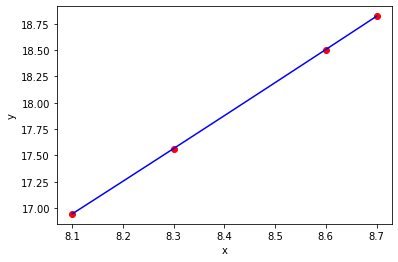

In [ ]:
#Para plotar o gráfico

x =  np.array([8.1,8.3,8.6,8.7],float)
y = np.array([16.94410, 17.56492, 18.50515, 18.82091],float)

xplt = np.linspace(x[0], x[-1])
yplt = np.array([],float)
for xp in xplt:
  yp = 0

  for xi,yi in zip(x,y):      #A função zip quebra o array em pares ordenados 
    yp += yi*np.prod((xp - x[x != xi])/(xi - x[x != xi])) 
  yplt = np.append(yplt,yp)
     
#Plot

plt.plot(x,y, 'ro', xplt, yplt, 'b-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
  


<h1><u>Método dos Mínimos Quadrados</u></h1>

Considere uma função $f(x)$ tabelada pelos pontos $(x_1, f(x_1))$, $(x_2, f(x_2))$, $\dots$, $(x_n, f(x_n))$  e n funções $g_1, g_2, \dots, g_n$. Nosso objetivo será determinar constantes $\alpha_1, \dots, \alpha_n$ tais que a função $$\varphi(x) = \alpha_1 g_1(x) + \alpha_2 g_2(x) + \dots \alpha_n g_n(x)=\sum_{i=1}^{n}\alpha_i g_i(x)$$ 

aproxima da melhor forma possível a função $f(x)$.

Isso pode ser feito minimizando os erros $$ d_k = f(x_k) - \varphi(x_k) \ \ \ p/ \ \ k \in \{1,\,\,2,\,...,\,m\} $$

A abordagem do método dos mínimos quadrados consiste em minimizar o erro quadrático total: $$ \sum_{k=1}^{m}d_k^2 = \sum_{k=1}^{m}(f(x_k) - \varphi(x_k))^2$$

Consideramos a soma para analisar todos os erros simultaneamente e os quadrados para evitar um $d_k$ negativo diminua ou até mesmo cancele o erro total indevidamente.

In [ ]:
#Fitting function
def func(x, a, b):
    #return a*np.exp(b*x)
    return b/(a+x)
 


In [ ]:
#Dados de x e y   
xData = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6])
yData = np.array([0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015])
 


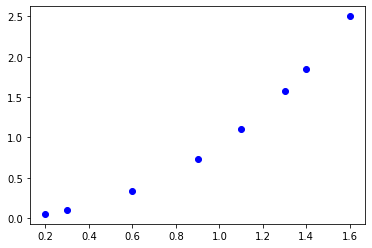

In [ ]:
#Plotando os pontos
plt.plot(xData, yData, 'bo', label='Dados-Experimentais')
 


In [ ]:
# Palpite inicial para os parametros
initialGuess = [1.0,1.0]    
 


In [ ]:
#Performance da curva_fit
popt, pcov = curve_fit(func, xData, yData, initialGuess)
print(popt)

 


[41157384.91949028 42316695.68225762]


In [ ]:
#Valores de x para função que melhor se adapta
xFit = np.arange(0.0, 5.0, 0.01)    #Ele separa o eixo de 0 a 5 de 0.01
 


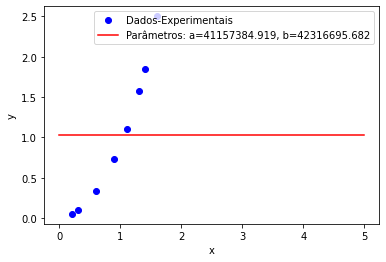

In [ ]:
#Plot the fitted function
plt.plot(xData, yData, 'bo', label='Dados-Experimentais')
plt.plot(xFit, func(xFit, *popt), 'r', label='Parâmetros: a=%5.3f, b=%5.3f' % tuple(popt))
 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
 


<h1><u>Integração Numérica</u></h1>

Em cálculo 1, aprendemos que toda função continua $f(x)$ possui uma primitivva $F(x)$, isto é, uma função tal que $F'(x) = f(x)$. Entretanto, nem sempre é possível encontrar uma fórmula para $F(x)$, como ocorre no caso de $f(x) = e^{x^2}$. Mesmo assim, funções como essa são importantes, portanto, precisamos integrar funções como essa sem recorrer ao Teorema Fundamental do Cálculo. Da mesma forma, se $f(x)$ for uma função tabelada por um número finito de pontos, também precisaremos de técnicas novas para calcular integrais.

<h1>Regra dos Trapézios</h1>

Considere uma função contínua $f(x)$, definida no intervalo $[a,b]$. Vamos dividir o intervalo em $n$ subintervalos $[x_{i-1}, x_i]$, com $a=x_0<x_1< \dots < x_n=b $, de modo que todos os subintervalos tenham comprimento $h$. A ideia consiste em formar $n$ trapézios conectando pontos $(x_{i-1}, f(x_{i-1}))$ e $(x_{i}, f(x_{i}))$ consecutivos. Note que a soma das áreas dos trapézios é uma aproximação para área abaixo da curva e, portanto, para $$\int_{a}^{b} f(x) \,dx$$

no casa em que $f(x)$ é não negativo.

A altura de todos esses trapézios vale $h$. Enquanto suas bases medem $f(x_{i-1})$ e $f(x_i)$. A soma das áreas dos traézios vale 

$$ \dfrac{(f(x_0) + f(x_1))h}{2} + \dfrac{(f(x_0) + f(x_1))h}{2} + \dfrac{(f(x_0) + f(x_1))h}{2} + \dfrac{(f(x_0) + f(x_1))h}{2} = \dfrac{h}{2}(f(x_0) + 2f(x_1) + 2f(x_2) + 2f(x_3) + f(x_4)) $$ 

Em geral, se tivermos, $n+1$ pontos $x_0, x_1, \dots, x_n$ então $$ \int_{a}^{b} f(x) \,dx =  \dfrac{h}{2}(f(x_0) + 2f(x_1)+ \dots + 2f(x_{n-1}) + f(x_n))$$

Assim, dentro dos parênteses, todos os termos têm coeficientes iguais a $2$, exceto $f(x_0)$ e $f(x_n)$, cujos coeficientes valem $1$. Quanto maior o número de pontos, melhor será a precisão da regra, e se $f(x)$ for um polinômio de grau $1$ em cada subintervalo, então a regra dos traézios fornece o valor exato da integral.


In [ ]:
from math import sin, pi
f = lambda x: (x**2)*np.cos(x)
a = 0
b = pi/2
n = 4
h = (b - a) / n
S = 0.5*(f(a)+f(b))
for i in range(1,n):
    S += f(a + i*h)
Integral = h * S
print('Integral = %f' % Integral)

Integral = 0.435811


In [ ]:
def trapz(f,a,b,N):
    '''Aproximando a integral de f(x) de a até b pela regra do trapézio.
    Parameters
    ----------
    f : função
        Função de uma única variável
    a , b : números
        Intervalo de integração [a,b]
    N : inteiro
        Número de subintervalos de [a,b]

    '''
    x = np.linspace(a,b,N+1) # N+1 points make N subintervals
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

In [ ]:
trapz(f,2, 5, 9 )



0.2626893725492196

In [ ]:
def f(x):
  return np.exp(4 - (x**2))

In [ ]:
(2*f(0.5) + 1)

1.25

<h1>Regra de Simpson</h1>

Enquanto a regra do trapézio usa segmentos de reta para aproximar o gráfico de uma função a regra de Simpson usa parábolas. Para fixar as ideias, vamos supor que temos apenas três pontos $x_0, x_1$ e $x_2$ tais que $x_1 = x_0 + h$ e $x_2 = x_0 +2h$. Pela fórmula de Lagrange, o polinômio interpolador de $(x_0, f(x_0)), (x_1, f(x_1))$ e $(x_2, f(x_2))$ é $$p(x) = f(x_0)L_0(x) + f(x_1)L_1(x) + f(x_2)L_2(x) $$

$$L_0(x) = \dfrac{(x-x_1)(x-x_2)}{(x_0 - x_1)(x_0 - x_2)}$$

$$L_1(x) = \dfrac{(x-x_0)(x-x_2)}{(x_1 - x_0)(x_1 - x_2)}$$

$$L_2(x) = \dfrac{(x-x_0)(x-x_1)}{(x_2 - x_0)(x_2 - x_1)}$$


Vamos aproximar a integral $\int_{x_0}^{x_2} f(x) \,dx$ por $\int_{x_0}^{x_2} p(x) \,dx$ 

Assim, temos:  

$$ \int_{x_0}^{x_2} f(x) \,dx  \simeq \int_{x_0}^{x_2} p(x) \,dx = f(x_0) \int_{x_0}^{x_2} \dfrac{(x-x_1)(x-x_2)}{(x_0 - x_1)(x_0 - x_2)} \,dx + f(x_1)\int_{x_0}^{x_2} \dfrac{(x-x_0)(x-x_2)}{(x_1 - x_0)(x_0 - x_2)} \,dx + f(x_2)\int_{x_0}^{x_2} \dfrac{(x-x_0)(x-x_1)}{(x_2 - x_0)(x_2 - x_1)} \,dx$$

Abrindo as contas, concluímos que $$\int_{x_0}^{x_2} f(x) \,dx \simeq \dfrac{h}{3}(f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + f(x_4) )$$

Com 7 pontos: $$\int_{x_0}^{x_2} f(x) \,dx \simeq \dfrac{h}{3}(f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + 2f(x_4) + 4f(x_5) + f(x_6) ) $$

Em geral, com $n+1$ pontos $\begin{cases}
    f(x_0) \ \, \textrm{e } f(x_n), \ \, \textrm{tem coeficientes iguais a } 1;\\
    \textrm{Os demais } f(x_j), \ \textrm{com j par, tem coeficientes iguais a} \ 2 \\
    f(x_j), \ \textrm{com j ímpar, tem coeficientes iguais a} \ 4
   \end{cases} $

In [ ]:
'''
Método: Regra de Simpson's 1/3
''' 
from math import sin, pi
f = lambda x: (x**2)*np.cos(x)
a = 0
b = pi/2
n = 4
h = (b - a) / n
S = f(a)+f(b)
for i in range(1,n,2):
    S += 4*f(a + i*h)
for i in range(2,n,2):
    S += 2*f(a + i*h)
Integral = h/3 * S
print('Integral = %f' % Integral)

Integral = 0.466890


<h1> Quadratura de Gauss-Legendre</h1>



In [ ]:
def gauss1(f,n):
    [x,w] = p_roots(n+1)
    G=sum(w*f(x))
    return G

def gauss(f,n,a,b):
    [x,w] = p_roots(n+1)
    G=0.5*(b-a)*sum(w*f(0.5*(b-a)*x+0.5*(b+a)))
    return G

In [ ]:
def f(x):
    return (x**2)*np.cos(x) 

gauss(f,4,0,pi/2)

0.4674010973769685

<h1> Regra do Ponto Médio</h1>


In [ ]:
def midpoint(f, a, b, n):
    h = float(b-a)/n
    result = 0
    for i in range(n):
        result += f((a + h/2.0) + i*h)
    result *= h
    return result

In [ ]:
midpoint(f,2,5,9)


0.20842044229261983

In [ ]:
abs(k - 0.346573)

0.053427

#Questão 1

In [ ]:
x =  np.array([8.1,8.3,8.6,8.7],float)
y = np.array([16.94410, 17.56492, 18.50515, 18.82091],float)

xp = float(input("Valor de x: "))
yp = 0
for xi,yi in zip(x,y):      #A função zip quebra o array em pares ordenados 
    yp += yi*np.prod((xp - x[x != xi])/(xi - x[x != xi])) 

print("para x = $%.2f, y = %f" %(xp,yp))

In [ ]:
x =  np.array([0.6, 0.7, 0.8, 1.0],float)
y = np.array([-0.17694460, 0.01375227, 0.22363362, 0.65809197],float)

xp = float(input("Valor de x: "))
yp = 0
for xi,yi in zip(x,y):      #A função zip quebra o array em pares ordenados 
    yp += yi*np.prod((xp - x[x != xi])/(xi - x[x != xi])) 

print("para x = $%.2f, y = %f" %(xp,yp))

Valor de x: 0.9
para x = $0.90, y = 0.441985


#Questão 3
- Construa pelo método dos mínimos quadrados a melhor função que se ajusta aos pontos.

<ol>
<li> $y = ax + b$ </li>
<li> $y = ax^2 + bx + c$ </li>
<li> $y = ax^3 + bx^2 + cx + d$ </li>
<li> $f(x) = be^{ax}$ </li>
<li> $f(x) = bx^a$</li>
<li> $f(x) = \dfrac{a}{b+x} $</li>
    
<ol>

#1) $y = ax + b$

[ 1.66554008 -0.51245682]


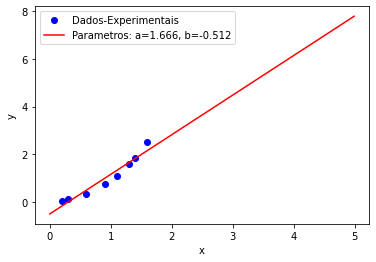

In [ ]:
#Função
def func(x, a, b):
    return a*x+b 
 
#Dados de x e y
xData = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6])
yData = np.array([0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015])
 
#Plot experimental data points
plt.plot(xData, yData, 'bo', label='Dados-Experimentais')
 
#Chute inicial dos parâmetros
initialGuess = [1.0,1.0]    
 
#Valor ótimo dos parâmetros
popt, pcov = curve_fit(func, xData, yData, initialGuess)
print(popt)
 
#Valores de x para nova curva
xFit = np.arange(0.0, 5.0, 0.01)
 
#Plot da Função
plt.plot(xFit, func(xFit, *popt), 'r', label='Parametros: a=%5.3f, b=%5.3f' % tuple(popt))
 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#2)  $y = ax^2 + bx + c$

[ 1.12942386 -0.31140344  0.08514393]


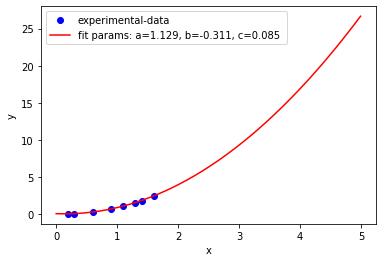

In [ ]:
#Função
def func(x, a, b, c):
    return a*(x**2) + b*x + c
    
 
#Dados de x e y   
xData = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6])
yData = np.array([0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015])
 
#Plot dos pontos
plt.plot(xData, yData, 'bo', label='experimental-data')
 
#Chute inicial dos parâmetros
initialGuess = [1.0,1.0,1.0]    
 
#Valor ótimo para os parâmetros
popt, pcov = curve_fit(func, xData, yData, initialGuess)
print(popt)
 
#Valores de x para nova curva
xFit = np.arange(0.0, 5.0, 0.01)
 
#Plot da Função
plt.plot(xFit, func(xFit, *popt), 'r', label='fit params: a=%5.3f, b=%5.3f, c=%5.3f ' % tuple(popt))
 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#3)  $y = ax^3 + bx^2 + cx + d$

[ 0.26620809  0.40293222  0.24838578 -0.0184014 ]


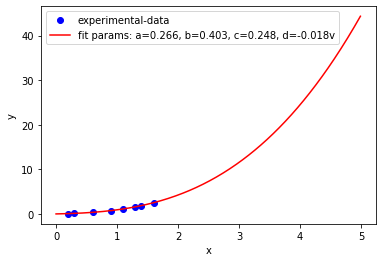

In [ ]:

#Função
def func(x, a, b, c, d):
    return a*(x**3) + b*(x**2) + c*x + d 
    
 
#Dados de x e y    
xData = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6])
yData = np.array([0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015])
 
#Plot dos pontos
plt.plot(xData, yData, 'bo', label='experimental-data')
 
#Chute inicial dos parâmetros
initialGuess = [1.0,1.0,1.0,1.0]    
 
#Valores ideias para curva ótima
popt, pcov = curve_fit(func, xData, yData, initialGuess)
print(popt)
 
#Valores de x para nova curva
xFit = np.arange(0.0, 5.0, 0.01)
 
#Plot da função 
plt.plot(xFit, func(xFit, *popt), 'r', label='fit params: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3fv' % tuple(popt))
 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#4) $f(x) = be^{ax}$

[1.85831477 0.13258633]


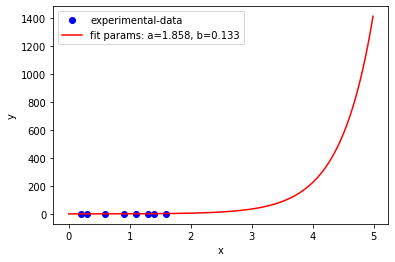

In [ ]:
#Função
def func(x, a, b):
    return b*np.exp(a*x)
    
 
#Dados de x e y  
xData = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6])
yData = np.array([0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015])
 
#Plot dos pontos
plt.plot(xData, yData, 'bo', label='experimental-data')
 
#Chute dos parâmetros 
initialGuess = [1.0,1.0]    
 
#Valor ótimo dos parâmetros
popt, pcov = curve_fit(func, xData, yData, initialGuess)
print(popt)
 
#Valores de x para nova curva
xFit = np.arange(0.0, 5.0, 0.01)
 
#Plot da Função
plt.plot(xFit, func(xFit, *popt), 'r', label='fit params: a=%5.3f, b=%5.3f' % tuple(popt))
 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#5) $f(x) = bx^a$

[2.14277288 0.90552245]


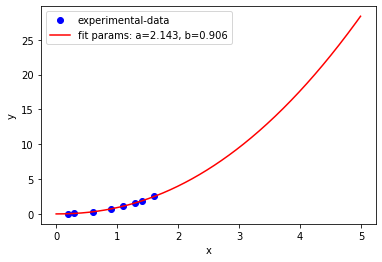

In [ ]:
#Função
def func(x, a, b):
  return b*(x**a)
    
 
#Dados de x e y  
xData = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6])
yData = np.array([0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015])
 
#Plot dos pontos
plt.plot(xData, yData, 'bo', label='experimental-data')
 
# Chute inicial 
initialGuess = [1.0,1.0]    
 
#Valor ótimo dos parâmetros
popt, pcov = curve_fit(func, xData, yData, initialGuess)
print(popt)
 
#Valores de x para nova curva
xFit = np.arange(0.0, 5.0, 0.01)
 
#Plot da Função
plt.plot(xFit, func(xFit, *popt), 'r', label='fit params: a=%5.3f, b=%5.3f' % tuple(popt))
 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#6)  $f(x) = \dfrac{a}{b+x} $

[21537345.93236423 22144004.50633563]


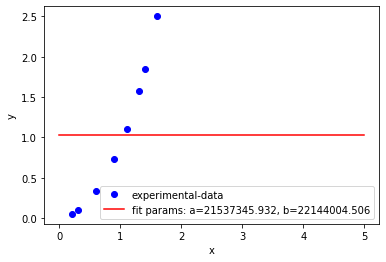

In [ ]:
#Fitting function
def func(x, a, b):
  y = (a/b) + (x/b)
  return 1/y
 
#Experimental x and y data points    
xData = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6])
yData = np.array([0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015])
 
#Plot experimental data points
plt.plot(xData, yData, 'bo', label='experimental-data')
 
#Chute inicial dos parâmetros
initialGuess = [1.0,1.0]    
 
#Valor ótimo dos parâmetros
popt, pcov = curve_fit(func, xData, yData, initialGuess)
print(popt)
 
#Valores de x para nova curva
xFit = np.arange(0.0, 5.0, 0.01)
 
#Plot da Função
plt.plot(xFit, func(xFit, *popt), 'r', label='fit params: a=%5.3f, b=%5.3f' % tuple(popt))
 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#Questão 4

In [ ]:
x = [0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6]
y = [0.050446, 0.098426, 0.33277, 0.72660, 1.0972, 1.5697, 1.8487, 2.5015]
Res = 0
for i in range(0,8):
    Res = Res + abs(func(x[i],21537345.93236423, 22144004.50633563) - y[i])
print(Res)

5.808858162312017


In [ ]:
#Fitting function
def func(x, a, b):
  y = (a/b) + (x/b)
  return 1/y

#Questão 5

In [ ]:
def midpoint(f, a, b, n):
    h = float(b-a)/n
    result = 0
    for i in range(n):
        result += f((a + h/2.0) + i*h)
    result *= h
    return result

In [ ]:
def f(x):
  return 

In [ ]:
midpoint(f,0,1,1)

0.6065306597126334